<a href="https://colab.research.google.com/github/poonamkhot123/Linear-Regression/blob/main/Scikit_Learn_StandardScaler_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("/content/Social_Network_Ads.csv.xlsx")

In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df.drop('User ID',axis =1,inplace  = True)

In [10]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [11]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


# **Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

X=df.drop("Purchased",axis=1)
y=df['Purchased']

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [23]:
y_train

,Purchased
3,0
18,1
202,1
250,0
274,1
...,...
71,0
106,0
270,0
348,0


# **Applying StandardScaler**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
X_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [30]:
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled,columns=X_train.columns)

In [31]:
X_train_scaled

,Gender,Age,EstimatedSalary
0,-1.0,-1.066752,-0.386344
1,1.0,0.797535,-1.229939
2,-1.0,0.110692,1.853544
3,-1.0,0.601294,-0.909955
4,-1.0,1.876859,-1.288118
...,...,...,...
315,-1.0,-1.361114,-1.259028
316,-1.0,-1.164873,-1.026312
317,-1.0,0.503174,1.824455
318,1.0,0.110692,0.195445


In [32]:
X_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,320.000000,320.00000
mean,0.500000,37.871875,70281.25000
std,0.500783,10.207525,34430.55286
min,0.000000,18.000000,15000.00000
25%,0.000000,30.000000,43000.00000
50%,0.500000,37.000000,71000.00000
75%,1.000000,45.000000,88000.00000
max,1.000000,60.000000,150000.00000


In [33]:
np.round(X_train.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.5,37.87,70281.25
std,0.5,10.21,34430.55
min,0.0,18.00,15000.00
25%,0.0,30.00,43000.00
50%,0.5,37.00,71000.00
75%,1.0,45.00,88000.00
max,1.0,60.00,150000.00


In [34]:
np.round(X_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,320.0,320.00,320.00
mean,0.0,-0.00,0.00
std,1.0,1.00,1.00
min,-1.0,-1.95,-1.61
25%,-1.0,-0.77,-0.79
50%,0.0,-0.09,0.02
75%,1.0,0.70,0.52
max,1.0,2.17,2.32


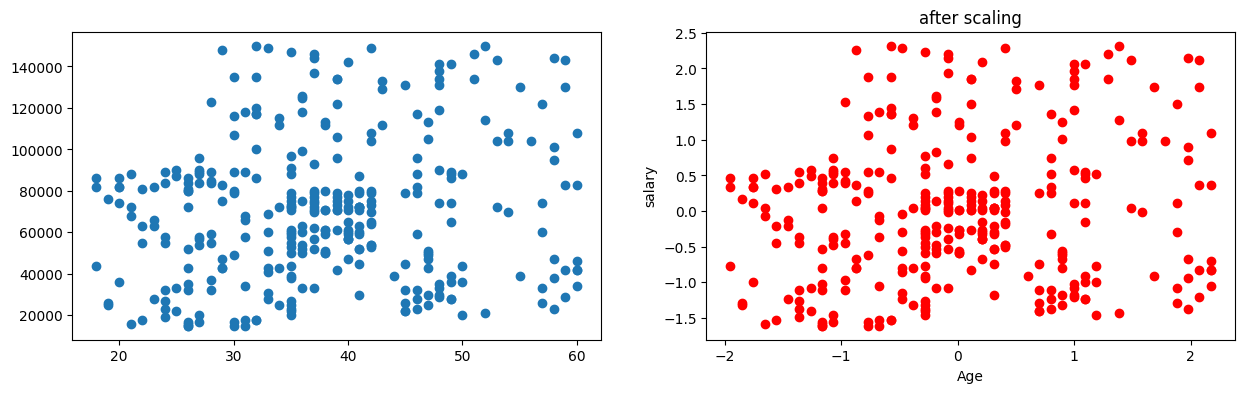

In [37]:
fig,(x1,x2) = plt.subplots(1,2,figsize=(15,4))

x1.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.title("before")
plt.xlabel("Age")
plt.ylabel("Salary")


x2.scatter(X_train_scaled["Age"],X_train_scaled['EstimatedSalary'],color='red')
plt.title("after scaling")
plt.xlabel("Age")
plt.ylabel('salary')
plt.show()